<a href="https://colab.research.google.com/github/Ritesh-Sil/Santander-Customer-Transaction-Prediction-Using-GBDT-and-Random-Forest/blob/Master/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import files
# files.upload()

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list -s 'Santander Customer Transaction Prediction'

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lakshmi25npathi/santander-customer-transaction-prediction-dataset  Santander Customer Transaction Prediction Dataset  250MB  2019-05-24 06:17:57           1662         33  0.5882353        
mrushan3/santander-customer-transaction-prediction                 santander customer transaction prediction            8MB  2020-01-30 04:52:15             76          7  0.23529412       
thaikeras/the-shakeups-of-10-competitions                          The Shakeups of 10 Competitions                      3MB  2019-04-17 14:10:17             32          1  0.0625           


In [8]:
!mkdir /content/santander

In [9]:
!cd /content/santander

In [10]:
!kaggle datasets download lakshmi25npathi/santander-customer-transaction-prediction-dataset

 97% 241M/250M [00:01<00:00, 139MB/s]
100% 250M/250M [00:01<00:00, 143MB/s]


In [11]:
!unzip /content/santander/santander-customer-transaction-prediction-dataset.zip -d santander

Archive:  /content/santander/santander-customer-transaction-prediction-dataset.zip
  inflating: santander/test.csv      
  inflating: santander/train.csv     


In [12]:
!rm -rf /content/santander/santander-customer-transaction-prediction-dataset.zip

## **Import the libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [14]:
df_train  = pd.read_csv('/content/santander/train.csv')
df_train.sample(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
111376,train_111376,0,9.5028,-5.7183,9.9161,5.4856,12.2521,-19.2856,5.6509,18.9444,...,6.9888,7.8309,0.3909,1.4377,15.6018,1.2922,-2.4924,7.5046,13.8695,3.7872
142436,train_142436,0,11.4230,-1.0397,12.0697,4.9319,10.5169,6.8050,5.1299,12.9989,...,2.6050,11.2434,4.4056,8.3781,11.2073,2.2541,4.7401,8.6515,17.7480,7.7755
92567,train_92567,0,6.9519,-0.0040,9.8299,7.9406,9.9490,-13.5043,4.5398,13.7280,...,7.4422,6.9139,0.8621,2.4705,16.2711,-0.6231,8.5560,8.1144,21.5290,5.5877
117142,train_117142,0,6.6347,-2.6420,13.6998,1.8865,9.7408,-2.3744,5.6198,12.3465,...,-1.2046,6.3442,1.2037,7.9047,13.2420,-0.3358,-2.4920,7.9659,13.0995,-2.3417
171561,train_171561,0,10.0727,2.7770,7.7483,4.0891,10.9512,2.0111,5.1548,23.3065,...,4.1175,8.9465,2.0049,6.2198,19.5822,0.7132,2.3724,8.2649,17.7094,-8.7526


In [15]:
X = df_train.drop(['target','ID_code'], axis=1)
y = df_train['target']

In [16]:
y.sample(5)

107274    0
102658    0
80565     0
120019    0
178074    0
Name: target, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_clf = RandomForestClassifier(n_estimators=150,max_depth=4,class_weight='balanced',verbose=1)

In [21]:
rf_clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.1min finished


RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=150,
                       verbose=1)

In [22]:
import joblib

In [23]:
joblib.dump(rf_clf, 'Random_forest.pkl')

['Random_forest.pkl']

In [24]:
rf_clf_model = joblib.load('/content/Random_forest.pkl')

In [25]:
rf_clf_model.predict_proba(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.2s finished


array([[0.50553393, 0.49446607],
       [0.51577727, 0.48422273],
       [0.51677505, 0.48322495],
       ...,
       [0.44310113, 0.55689887],
       [0.46704744, 0.53295256],
       [0.5704379 , 0.4295621 ]])

In [40]:
y_pred_prob_1 = rf_clf_model.predict_proba(X_train).T[1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished


In [46]:
y_pred_prob_1.shape

(160000,)

In [43]:
y_train.shape

(160000,)

In [28]:
y_pred_prob_1.shape

(160000,)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [30]:
y_train_pred = rf_clf_model.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


In [51]:
(y_pred_prob_1>0).astype(np.int8).shape

(160000,)

In [54]:
def fn_create_perf_df(y_act , y_prob, Threshold):
    performance = []
    while (Threshold <=1):    
        acc = accuracy_score(y_act, (y_prob> Threshold).astype(np.int8))
        pre = precision_score(y_act, (y_prob> Threshold).astype(np.int8))
        rec = recall_score(y_act, (y_prob> Threshold).astype(np.int8))
        performance.append((Threshold,acc,pre,rec))
        Threshold+=0.05      
    return pd.DataFrame(performance, columns=['Threshold', 'Accuracy', 'Precision','Recall'])

In [56]:
perf_df = fn_create_perf_df(y_train , y_pred_prob_1, 0)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Text(0, 0.5, 'Performance Metrics')

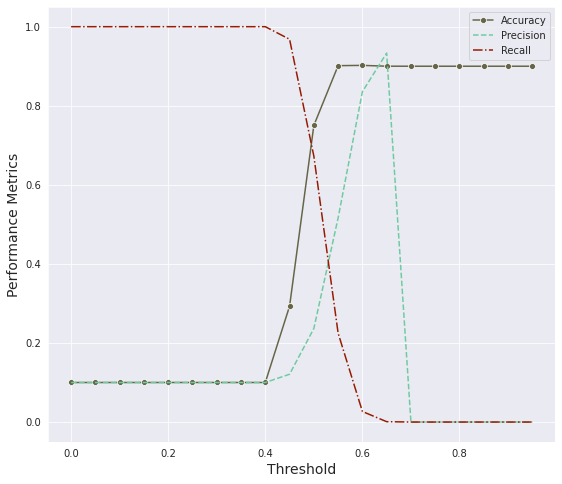

In [70]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
sns.set_style('darkgrid')
sns.lineplot(data =perf_df, x = 'Threshold', y = 'Accuracy', color ='#666547', label = 'Accuracy', marker = 'o' )
sns.lineplot(data =perf_df, x = 'Threshold', y = 'Precision', color ='#6fcb9f', label = 'Precision', linestyle = '--' )
sns.lineplot(data =perf_df, x = 'Threshold', y = 'Recall', color ='#961b00', label = 'Recall', linestyle = '-.' )
plt.xlabel('Threshold', fontsize = 14)
plt.ylabel('Performance Metrics', fontsize = 14)